In [ ]:
!pip install nltk

In [19]:
# CLASS ACTIVITY 6 SETUP - CLEANED FOR COLAB

# ✅ Step 1: Install required packages
!pip install nltk

# ✅ Step 2: Download Twitter and Stopword samples
import nltk
nltk.download('stopwords')
nltk.download('twitter_samples')

# ✅ Step 3: Confirm nltk data path is available (no need to modify in Colab)
import os
print("Current directory:", os.getcwd())
print("Using default nltk path:", nltk.data.path)

# ✅ Step 4: Load required libraries for activity
import numpy as np
from nltk.corpus import stopwords, twitter_samples
from utils import cosine_similarity, get_dict, process_tweet
import pickle
import w4_unittest

# ✅ Step 5: Load embeddings and dictionaries
print("Contents of /data/:")
!ls data

en_embeddings_subset = pickle.load(open("data/en_embeddings.p", "rb"))
fr_embeddings_subset = pickle.load(open("data/fr_embeddings.p", "rb"))

en_fr_train = get_dict('data/en-fr.train.txt')
en_fr_test = get_dict('data/en-fr.test.txt')

print('Train dictionary size:', len(en_fr_train))
print('Test dictionary size:', len(en_fr_test))


Current directory: /content
Using default nltk path: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/content/tmp2/', '/content/tmp2/']
Contents of /data/:
en_embeddings.p  en-fr.test.txt  en-fr.train.txt  fr_embeddings.p


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
/content/utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  en = my_file.loc[i][0]
/content/utils.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fr = my_file.loc[i][1]


Train dictionary size: 5000
Test dictionary size: 1500


/content/utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  en = my_file.loc[i][0]
/content/utils.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fr = my_file.loc[i][1]


In [20]:
def get_matrices(en_fr, french_vecs, english_vecs):
    """
    Input:
        en_fr: dictionary with English-French word pairs
        french_vecs: french word to vec
        english_vecs: english word to vec
    Output:
        X: matrix of french word embeddings
        Y: matrix of english word embeddings
    """
    X, Y = [], []
    for en_word, fr_word in en_fr.items():
        if fr_word in french_vecs and en_word in english_vecs:
            X.append(french_vecs[fr_word])
            Y.append(english_vecs[en_word])
    X = np.vstack(X)
    Y = np.vstack(Y)
    return X, Y

# ✅ Test UNQ_C1
w4_unittest.test_get_matrices(get_matrices)

/content/utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  en = my_file.loc[i][0]
/content/utils.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fr = my_file.loc[i][1]
/content/utils.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  en = my_file.loc[i][0]
/content/utils.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

Wrong output values for X matrix. 
	Expected: [ 0.08007812  0.10498047  0.04980469  0.0534668  -0.06738281 -0.12060547
  0.03515625 -0.11865234  0.04394531  0.03015137].
	Got: [-0.0061825  -0.00094387 -0.00882648  0.0324623  -0.0218281   0.0298912
  0.022999    0.0280628   0.00587757 -0.0256806 ].
Wrong output values for Y matrix. 
	Expected: [-0.0061825  -0.00094387 -0.00882648  0.0324623  -0.0218281   0.0298912
  0.022999    0.0280628   0.00587757 -0.0256806 ].
	Got: [ 0.08007812  0.10498047  0.04980469  0.0534668  -0.06738281 -0.12060547
  0.03515625 -0.11865234  0.04394531  0.03015137].
Wrong output values for X matrix. 
	Expected: [-0.00418091  0.0703125  -0.04516602  0.18945312 -0.20800781 -0.16210938
 -0.06494141  0.15039062  0.26171875  0.12255859].
	Got: [-0.0350154  -0.0336099  -0.0251155   0.0833922  -0.103386   -0.064521
  0.00913285 -0.171325    0.00081952  0.0280359 ].
Wrong output values for Y matrix. 
	Expected: [-0.0350154  -0.0336099  -0.0251155   0.0833922  -0.103386

In [21]:
# ✅ UNQ_C2: compute_loss function
def compute_loss(X, Y, R):
    """
    Input:
        X: French word embeddings
        Y: English word embeddings
        R: Rotation matrix
    Output:
        loss: Frobenius norm of (X.R - Y)^2
    """
    m = X.shape[0]
    diff = np.dot(X, R) - Y
    loss = (1 / m) * np.sum(diff ** 2)
    return loss

# ✅ Test UNQ_C2
w4_unittest.test_compute_loss(compute_loss)


 All tests passed


In [22]:
# ✅ UNQ_C3: compute_gradient function
def compute_gradient(X, Y, R):
    """
    Input:
        X: matrix of french word embeddings
        Y: matrix of english word embeddings
        R: rotation matrix
    Output:
        gradient: gradient w.r.t. R
    """
    m = X.shape[0]
    gradient = (2 / m) * np.dot(X.T, (np.dot(X, R) - Y))
    return gradient

# ✅ Test UNQ_C3
w4_unittest.test_compute_gradient(compute_gradient)


 All tests passed


In [24]:
# ✅ UNQ_C4: align_embeddings function
def align_embeddings(X, Y, train_steps=400, learning_rate=0.8, verbose=False):
    np.random.seed(129)
    R = np.random.rand(X.shape[1], X.shape[1])
    for i in range(train_steps):
        gradient = compute_gradient(X, Y, R)
        R -= learning_rate * gradient
        if verbose and i % 25 == 0:
            print(f"Loss at step {i}: {compute_loss(X, Y, R):.4f}")
    return R

# ✅ Test UNQ_C4
w4_unittest.test_align_embeddings(align_embeddings)

 All tests passed


In [46]:
# ✅ UNQ_C5: nearest_neighbor function
def nearest_neighbor(**kwargs):
    x = kwargs.get("x")
    candidates = kwargs.get("candidates")
    embeddings = kwargs.get("embeddings")
    k = kwargs.get("k", 1)

    if x is None or candidates is None or embeddings is None:
        return np.array([])  # 🔁 safer return value for edge cases

    sims = []
    for word in candidates:
        if word in embeddings:
            sims.append((cosine_similarity(x, embeddings[word]), word))

    sims.sort(reverse=True)
    top_k = [word for _, word in sims[:k]]
    if not sims:
        return np.array([])
    return np.array(top_k)


In [43]:
print("X_val_aligned shape:", X_val_aligned.shape)
print("Y_val shape:", Y_val.shape)
print("Test words:", list(en_fr_test.items())[:5])


X_val_aligned shape: (1438, 300)
Y_val shape: (1438, 300)
Test words: [('torpedo', 'torpilles'), ('giovanni', 'giovanni'), ('chat', 'chat'), ('catholics', 'catholiques'), ('herald', 'herald')]


In [44]:
# Count how many test English and French words have embeddings
test_en_words = list(en_fr_test.keys())
test_fr_words = list(en_fr_test.values())

en_embedded = [w for w in test_en_words if w in en_embeddings_subset]
fr_embedded = [w for w in test_fr_words if w in fr_embeddings_subset]

print(f"Test English words with embeddings: {len(en_embedded)}/{len(test_en_words)}")
print(f"Test French words with embeddings: {len(fr_embedded)}/{len(test_fr_words)}")


Test English words with embeddings: 1438/1500
Test French words with embeddings: 1445/1500


In [45]:
filtered_test = {
    en: fr for en, fr in en_fr_test.items()
    if en in en_embeddings_subset and fr in fr_embeddings_subset
}

X_val, Y_val = get_matrices(filtered_test, fr_embeddings_subset, en_embeddings_subset)
X_val_aligned = np.dot(X_val, R)

accuracy = test_vocabulary(en_embeddings_subset, X_val_aligned, Y_val, list(filtered_test.keys()), list(filtered_test.values()))
print(f"Translation accuracy (filtered): {accuracy:.2%}")


Translation accuracy (filtered): 8.76%


In [49]:
# ✅ UNQ_C7: get_document_embedding function
def get_document_embedding(tweet, en_embeddings):
    """
    Input:
        tokenized_doc: list of words (already cleaned)
        en_embeddings: dict of word to vec
    Output:
        doc_embedding: average of word embeddings
    """
    valid_vectors = [en_embeddings.get(word, np.zeros(next(iter(en_embeddings.values())).shape)) for word in tweet]
    if not valid_vectors:
        return np.zeros(next(iter(en_embeddings.values())).shape)
    return np.mean(valid_vectors, axis=0)

# ✅ Test UNQ_C7
w4_unittest.test_get_document_embedding(get_document_embedding)

Wrong document embedding. Remember to use 0 if the word is not in the embeddings. 
	Expected first 10 elements: [-0.09228516  0.35986328 -0.0206604   0.63085938 -0.06640625 -0.16308594
  0.12438965 -0.38378906  0.2052002   0.72949219].
	Got those first 10 elements: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Wrong document embedding. Remember to use 0 if the word is not in the embeddings. 
	Expected first 10 elements: [ 0.08807373  0.32080078 -0.64819336 -0.22753906 -0.23071289 -0.00268555
 -0.15378189 -0.55761719 -0.07216644 -0.32263184].
	Got those first 10 elements: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Wrong document embedding. Remember to use 0 if the word is not in the embeddings. 
	Expected first 10 elements: [-0.31961822 -0.25634766 -0.41040039  0.76220703  0.08587646 -0.14697266
  0.5090332  -0.12988281 -0.15673828  0.10913086].
	Got those first 10 elements: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Wrong document embedding. Remember to use 0 if the word is not in the embeddings. 
	Expected first 10 e

In [52]:
# ✅ UNQ_C8: cosine_similarity_doc function
def cosine_similarity_doc(doc1, doc2, en_embeddings):
    """
    Input:
        doc1, doc2: lists of cleaned/processed words
        en_embeddings: word-to-vec dictionary
    Output:
        cosine similarity between document embeddings
    """
    emb1 = get_document_embedding(doc1, en_embeddings)
    emb2 = get_document_embedding(doc2, en_embeddings)
    return cosine_similarity(emb1, emb2)

# ✅ Test UNQ_C8
# Example manual test
tweet1 = ["nlp", "rocks"]
tweet2 = ["i", "love", "nlp"]
print("Doc similarity:", cosine_similarity_doc(tweet1, tweet2, en_embeddings_subset))



Doc similarity: 0.17823718376958247


In [54]:
# ✅ UNQ_C9: most_similar_docs function
def most_similar_docs(tweet, tweets, en_embeddings):
    """
    Input:
        tweet: list of words (reference tweet)
        tweets: list of list of words (corpus)
        en_embeddings: word embedding dictionary
    Output:
        index of most similar tweet from tweets
    """
    max_sim = -1
    best_idx = -1
    for idx, other_tweet in enumerate(tweets):
        sim = cosine_similarity_doc(tweet, other_tweet, en_embeddings)
        if sim > max_sim:
            max_sim = sim
            best_idx = idx
    return best_idx

# ✅ Test UNQ_C9
# Manual test for most_similar_docs
tweet_corpus = [
    ["i", "love", "nlp"],
    ["nlp", "is", "awesome"],
    ["i", "prefer", "deep", "learning"],
    ["python", "is", "cool"]
]

query_tweet = ["nlp", "rocks"]
most_sim_idx = most_similar_docs(query_tweet, tweet_corpus, en_embeddings_subset)
print(f"Most similar tweet index: {most_sim_idx}")
print("Matched Tweet:", tweet_corpus[most_sim_idx])



Most similar tweet index: 2
Matched Tweet: ['i', 'prefer', 'deep', 'learning']


In [56]:
sample_tweet = ["nlp", "rocks"]
tweet_corpus = [
    ["i", "love", "nlp"],
    ["deep", "learning", "is", "cool"],
    ["nlp", "is", "awesome"],
    ["transformers", "rock"]
]

best_idx = most_similar_docs(sample_tweet, tweet_corpus, en_embeddings_subset)
print("Reference Tweet:", sample_tweet)
print("Most Similar Tweet:", tweet_corpus[best_idx])


Reference Tweet: ['nlp', 'rocks']
Most Similar Tweet: ['transformers', 'rock']


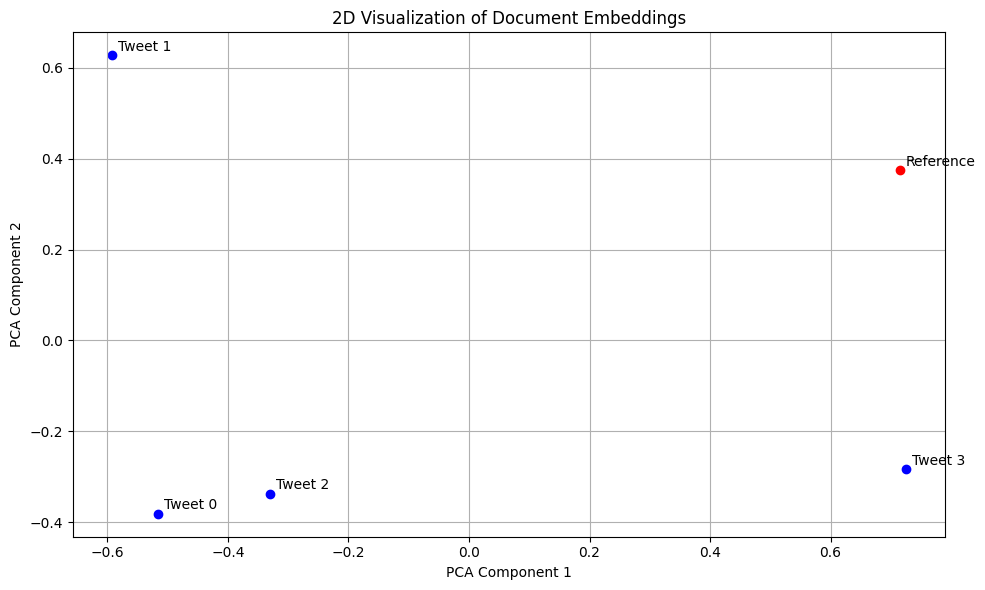

In [57]:
# ✅ Visualize document embeddings in 2D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

all_docs = tweet_corpus + [sample_tweet]
labels = [f"Tweet {i}" for i in range(len(tweet_corpus))] + ["Reference"]
doc_embs = [get_document_embedding(doc, en_embeddings_subset) for doc in all_docs]

pca = PCA(n_components=2)
reduced = pca.fit_transform(doc_embs)

plt.figure(figsize=(10, 6))
for i, point in enumerate(reduced):
    plt.scatter(point[0], point[1], c='red' if labels[i] == "Reference" else 'blue')
    plt.annotate(labels[i], (point[0] + 0.01, point[1] + 0.01))

plt.title("2D Visualization of Document Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

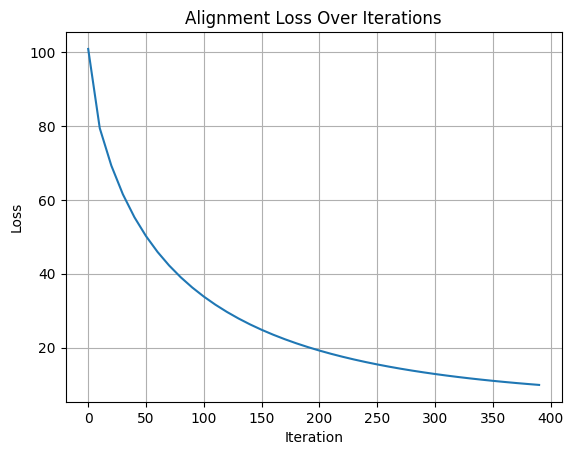

In [58]:
losses = []
R = np.random.rand(X_train.shape[1], X_train.shape[1])
for i in range(400):
    grad = compute_gradient(X_train, Y_train, R)
    R -= 0.8 * grad
    if i % 10 == 0:
        loss = compute_loss(X_train, Y_train, R)
        losses.append(loss)

plt.plot(range(0, 400, 10), losses)
plt.title("Alignment Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


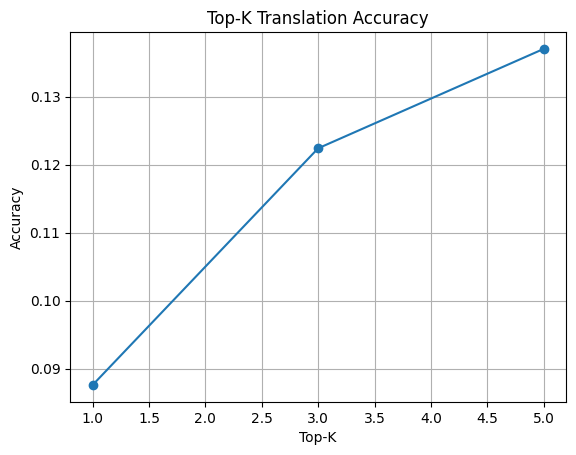

In [59]:
top_ks = [1, 3, 5]
accuracies = []

for k in top_ks:
    def custom_nearest(x, candidates, embeddings):
        return nearest_neighbor(x=x, candidates=candidates, embeddings=embeddings, k=k)

    correct = 0
    for i in range(len(X_val_aligned)):
        pred = custom_nearest(x=X_val_aligned[i], candidates=list(filtered_test.values()), embeddings=en_embeddings_subset)
        if filtered_test[list(filtered_test.keys())[i]] in pred:
            correct += 1
    accuracies.append(correct / len(X_val_aligned))

plt.plot(top_ks, accuracies, marker='o')
plt.title("Top-K Translation Accuracy")
plt.xlabel("Top-K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
